<h3><b>Convolution Neural Network(CNN)</b></h3>

1. First layer: Convolutional (Filters/ Kernels -> Features Detections).
2. Second layer: ReLU (Activation Function -> Removing negative values).
3. Third layer: Pooling (Dimension Reduction)

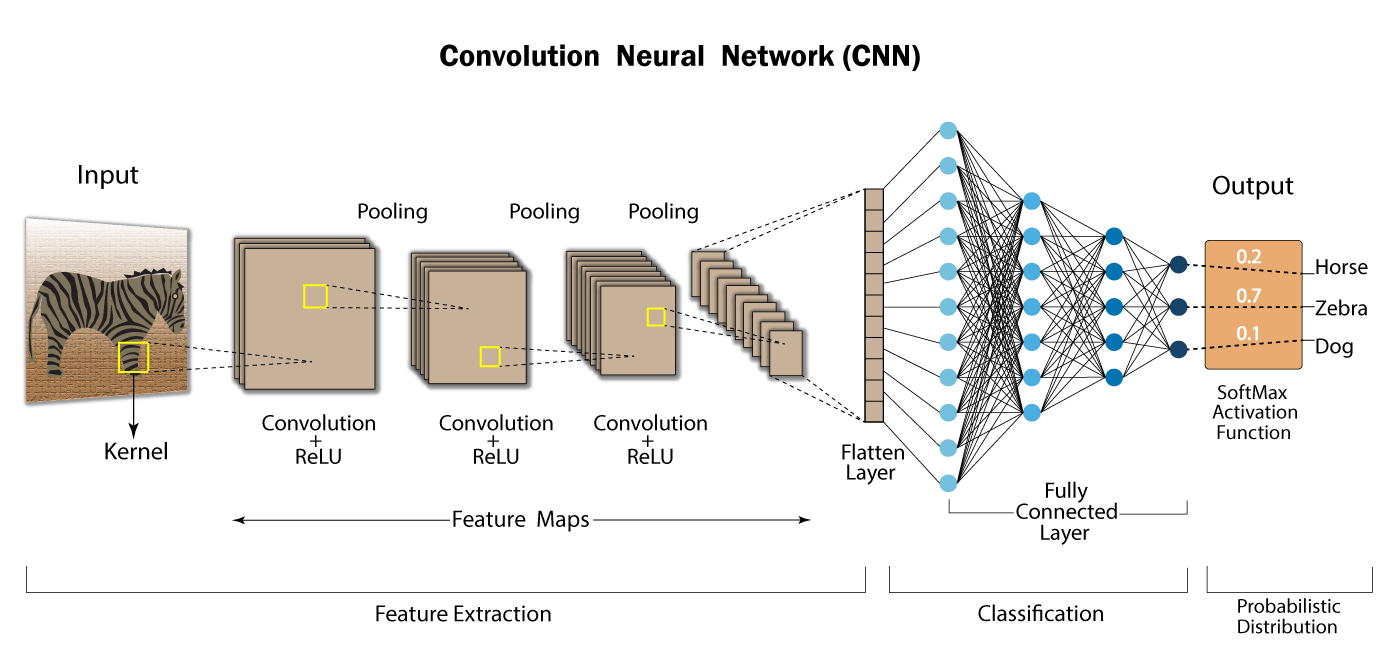
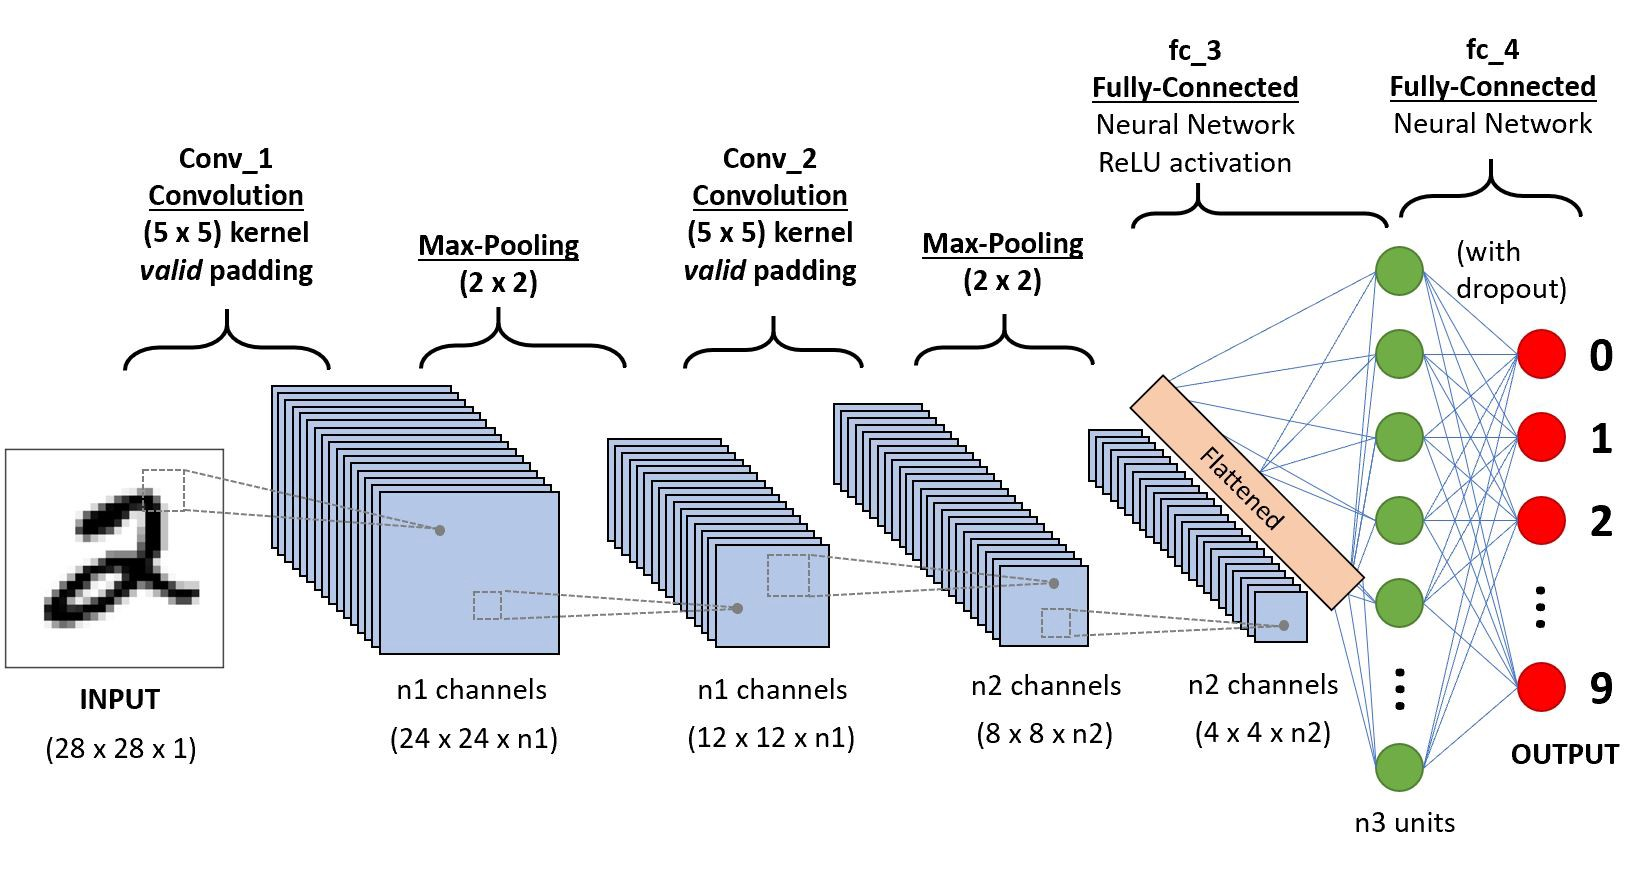

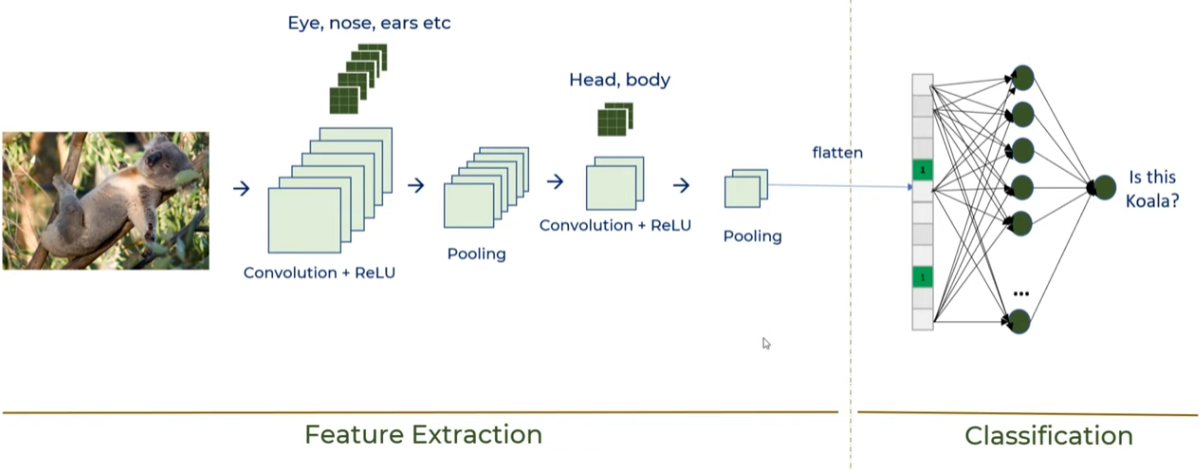

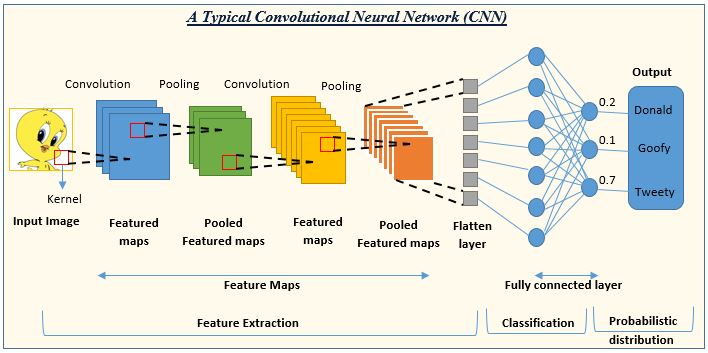

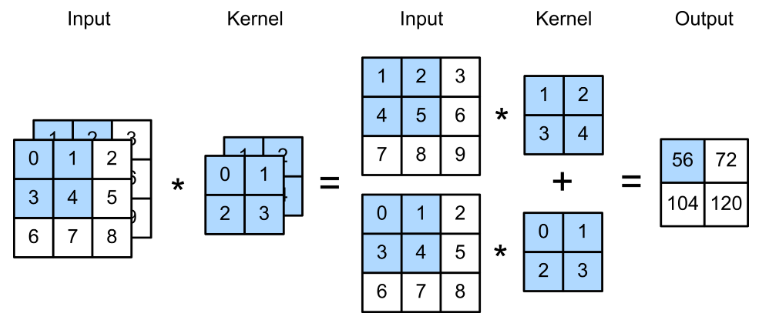

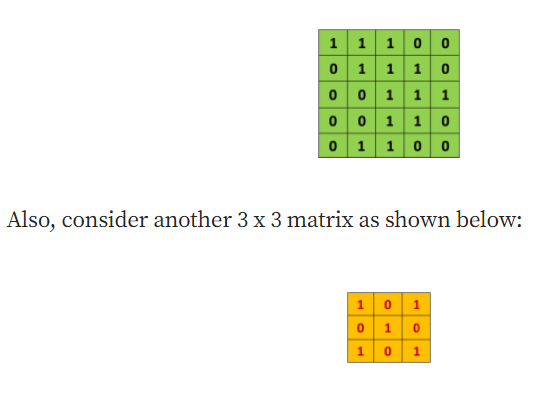

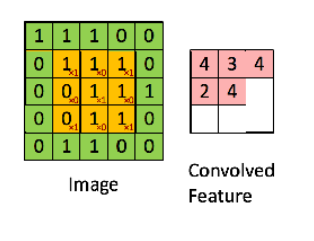

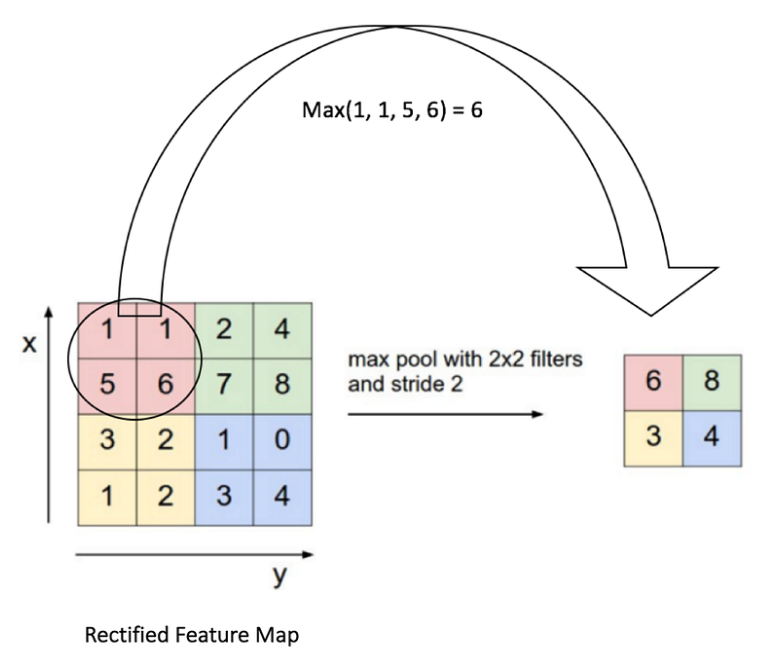

In [46]:
import matplotlib.pyplot as plt
import numpy as np

import sys
from PIL import Image
sys.modules['Image'] = Image 

import scipy

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

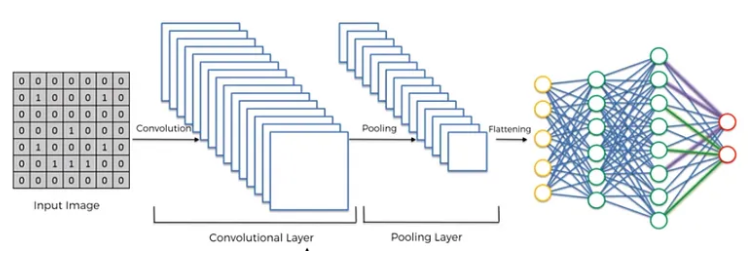

In [47]:
image_width = 150  # Width of an image
image_height = 150 # Height of an image
batch_size = 32    # Size of batch

number_of_channels = 3 # RGB
number_of_classes = 4  # CIRCLE, RECTANGLE, TRIANGLE, QUAD


training_data_directory = "training_data" # Path to training directory.
validation_data_directory = "validation_data" # Path to validation directory.

In [48]:
training_image_data_generator = ImageDataGenerator(
    rescale=1/255
)
validation_image_data_generator = ImageDataGenerator(
    rescale=1/255
)

traning_data_gen = training_image_data_generator.flow_from_directory(
    training_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_data_gen = validation_image_data_generator.flow_from_directory(
    validation_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 300 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [49]:
labels = {value: key for key, value in traning_data_gen.class_indices.items()}

print("Classes: ")
for key, value in labels.items():
    print(f"{key} : {value}")

Classes: 
0 : circle
1 : elipse
2 : rectangle
3 : square
4 : triangle


In [50]:
cnn_model = Sequential()
# FIRST LAYER
cnn_model.add(Convolution2D(
    filters=128,
    kernel_size=(5, 5),
    padding="valid",
    input_shape=(image_width, image_height, number_of_channels)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

# SECOND LAYER
cnn_model.add(Convolution2D(
    filters=64,
    kernel_size=(3, 3),
    padding='valid',
    kernel_regularizer=l2(0.00005)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# THIRD LAYER
cnn_model.add(Convolution2D(
    filters=32,
    kernel_size=(3, 3),
    padding='valid',
     kernel_regularizer=l2(0.00005)
))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=5, activation='softmax'))

In [51]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 146, 146, 128)     9728      
                                                                 
 activation_15 (Activation)  (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 73, 73, 128)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 73, 73, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_18 (Conv2D)          (None, 71, 71, 64)        73792     
                                                                 
 activation_16 (Activation)  (None, 71, 71, 64)       

In [52]:
"""
cnn_model = Sequential()
# FIRST LAYER
cnn_model.add(Convolution2D( # Convolution + ReLU
    filters=128,
    kernel_size=(3, 3),
    activation="relu",
    input_shape=(image_width, image_height, number_of_channels)
))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling

# SECOND LAYER
cnn_model.add(Convolution2D( # Convolution + ReLU
    filters=128,
    kernel_size=(3, 3),
    activation='relu'  
))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling

# THIRD LAYER
cnn_model.add(Convolution2D( # Convolution + ReLU
    filters=64,
    kernel_size=(3, 3),
    activation='relu'
))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling

 #FOURTH LAYER
cnn_model.add(Convolution2D( # Convolution + ReLU
     filters=32,
     kernel_size=(3, 3),
     activation='relu'
 ))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling
cnn_model.add(BatchNormalization(momentum=0.9))

# FITH LAYER
cnn_model.add(Convolution2D( # Convolution + ReLU
    filters=16,
    kernel_size=(3, 3),
    activation='relu'
))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling

# SIXTH LAYER
cnn_model.add(Flatten()) # Flattening values

# SEVENTH LAYER
cnn_model.add(Dense(1024, activation='relu'))

# EIGHT LAYER
cnn_model.add(Dropout(0.2))

# NEIGHT LAYER
cnn_model.add(Dense(512, activation='relu'))

# TENTH LAYER
cnn_model.add(Dropout(0.2))

# ELEVENTH LAYER
cnn_model.add(Dense(number_of_classes, activation='softmax'))
"""

'\ncnn_model = Sequential()\n# FIRST LAYER\ncnn_model.add(Convolution2D( # Convolution + ReLU\n    filters=128,\n    kernel_size=(3, 3),\n    activation="relu",\n    input_shape=(image_width, image_height, number_of_channels)\n))\ncnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling\n\n# SECOND LAYER\ncnn_model.add(Convolution2D( # Convolution + ReLU\n    filters=128,\n    kernel_size=(3, 3),\n    activation=\'relu\'  \n))\ncnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling\n\n# THIRD LAYER\ncnn_model.add(Convolution2D( # Convolution + ReLU\n    filters=64,\n    kernel_size=(3, 3),\n    activation=\'relu\'\n))\ncnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling\n\n #FOURTH LAYER\ncnn_model.add(Convolution2D( # Convolution + ReLU\n     filters=32,\n     kernel_size=(3, 3),\n     activation=\'relu\'\n ))\ncnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling\ncnn_model.add(BatchNormalization(momentum=0.9))\n\n# FITH LAYER\ncnn_model.add(Convolution2D( # Con

In [53]:
"""
cnn_model = Sequential()
cnn_model.add(Convolution2D(
    filters=32,     
    kernel_size=3,   
    strides=3,
    input_shape=(image_width, image_height, number_of_channels),
    activation='relu'
))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(4, activation='sigmoid'))
cnn_model.summary()
"""

"\ncnn_model = Sequential()\ncnn_model.add(Convolution2D(\n    filters=32,     \n    kernel_size=3,   \n    strides=3,\n    input_shape=(image_width, image_height, number_of_channels),\n    activation='relu'\n))\ncnn_model.add(MaxPooling2D(pool_size=(2,2)))\ncnn_model.add(Flatten())\ncnn_model.add(Dense(128, activation='relu'))\ncnn_model.add(Dense(4, activation='sigmoid'))\ncnn_model.summary()\n"

In [54]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=np.sqrt(0.1),
    patience=5
)

optimizer = Adam(learning_rate=0.001)

cnn_model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [61]:
history = cnn_model.fit(
    traning_data_gen,
    epochs=50,
    validation_data=validation_data_gen,
    verbose=2,
    callbacks=[reduce_lr]
)

NameError: name 'scipy' is not defined